In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
your_path = 'Путь до csv файла'
data = pd.read_csv(your_path)
# data = pd.read_csv('../data/train_dataset.csv')

# Построение графиков

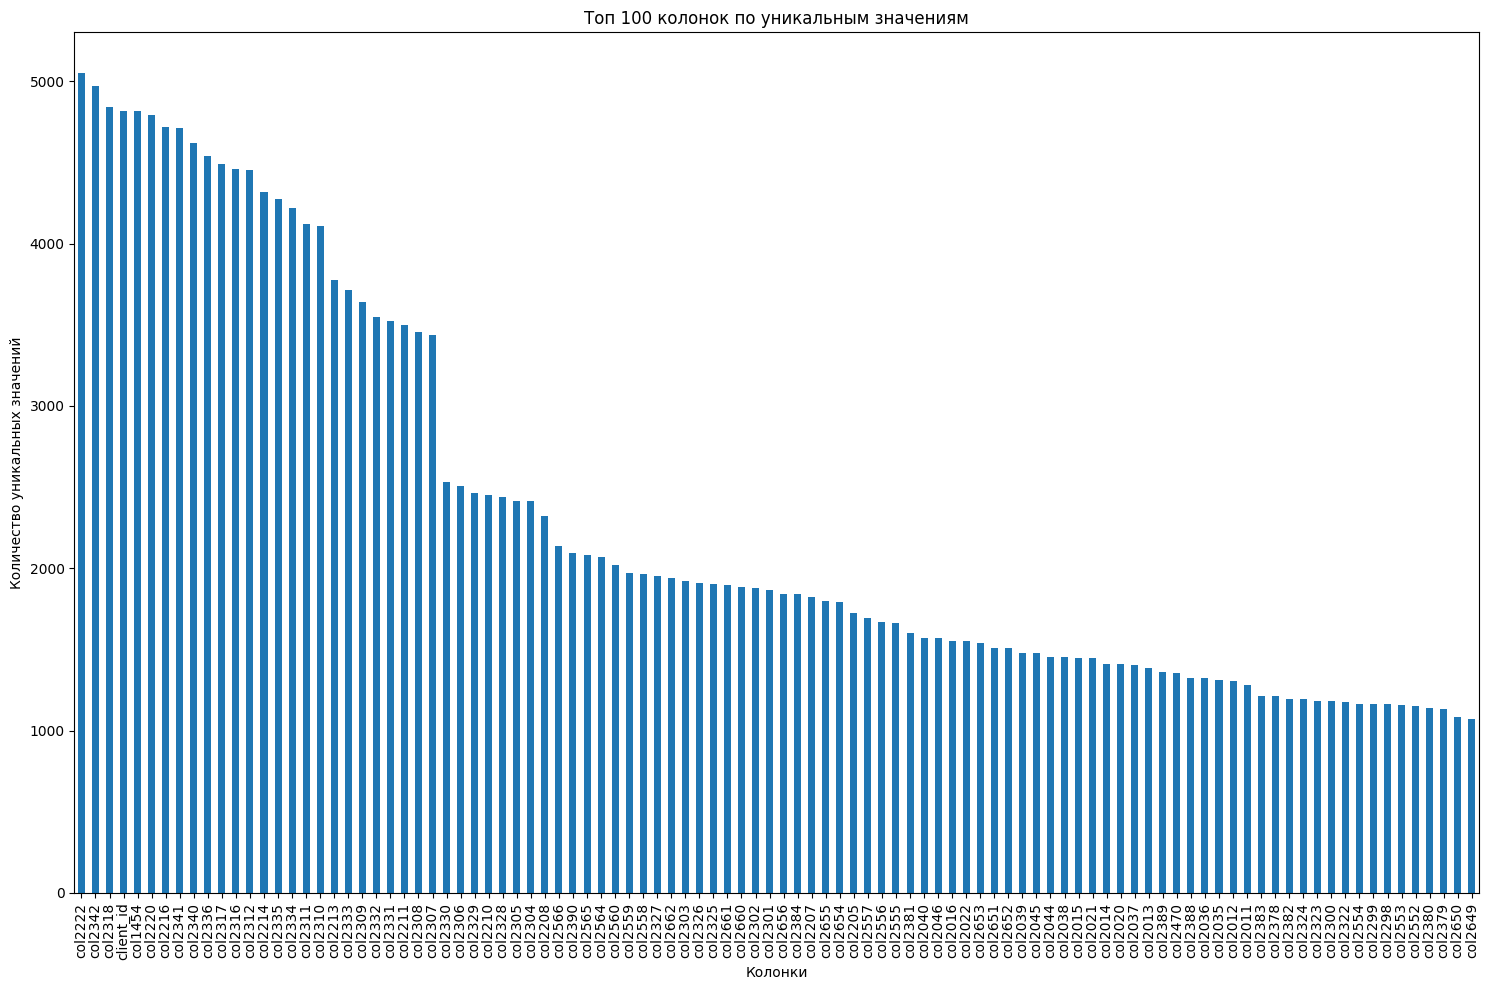

In [8]:
#1. Количество уникальных значений 
unique_counts = data.nunique().sort_values(ascending=False)

top_100_cols = unique_counts.head(100)

plt.figure(figsize=(15,10))
top_100_cols.plot(kind='bar')
plt.ylabel('Количество уникальных значений')
plt.xlabel('Колонки')
plt.title('Топ 100 колонок по уникальным значениям')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


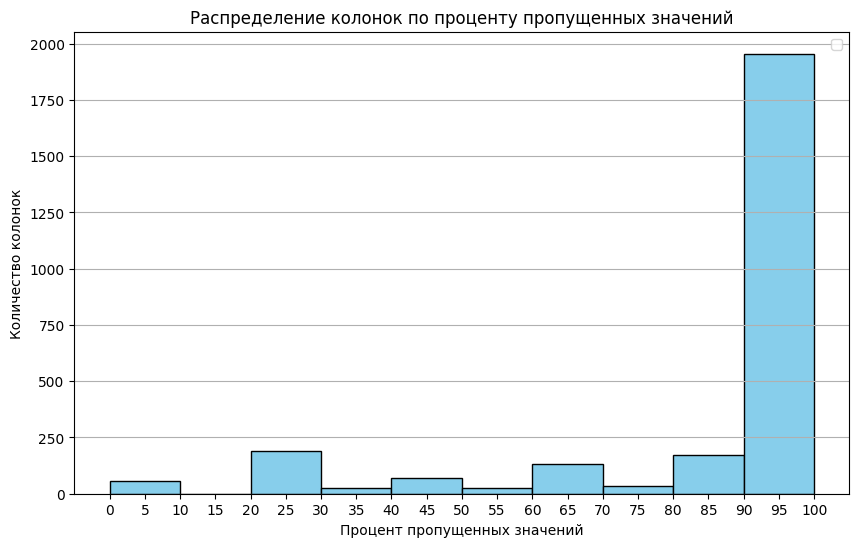

In [9]:
#2. Распределение колонок по проценту пропущенных значений
def plot_missing_values_histogram(df, bins=10):
    """
    Построение гистограммы распределения колонок по проценту пропущенных значений.

    Parameters:
    - df: DataFrame, в котором необходимо анализировать пропущенные значения.
    - bins: количество корзин для гистограммы.
    """
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    plt.figure(figsize=(10, 6))
    plt.hist(missing_percentage, bins=bins, color='skyblue', edgecolor='black')
    plt.title('Распределение колонок по проценту пропущенных значений')
    plt.xlabel('Процент пропущенных значений')
    plt.ylabel('Количество колонок')
    plt.grid(axis='y')
    plt.xticks(list(range(0, 105, 5)))
    plt.legend()
    plt.show()

plot_missing_values_histogram(data)

In [10]:
df = data.copy()
df['report_date'] = df['report_date'].astype('datetime64[ns]')
df = df.sort_values(by='report_date')

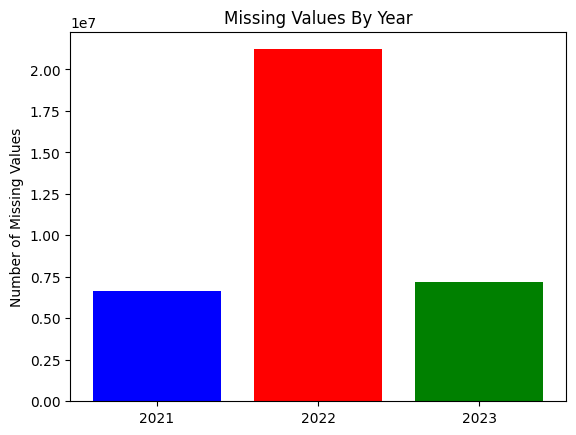

In [12]:
#3. Подсчет пропущенных значений по годам
df_2021 = df[df['report_date'] <= '2021-12-01']
df_2022 = df[(df['report_date'] > '2021-12-01') & (df['report_date'] <= '2022-12-01')]
df_2023 = df[df['report_date'] >= '2022-12-01']

missing_2021 = df_2021.isnull().sum().sum()
missing_2022 = df_2022.isnull().sum().sum()
missing_2023 = df_2023.isnull().sum().sum()

labels = ['2021', '2022', '2023']
values = [missing_2021, missing_2022, missing_2023]

plt.bar(labels, values, color=['blue', 'red', 'green'])
plt.title('Missing Values By Year')
plt.ylabel('Number of Missing Values')
plt.show()

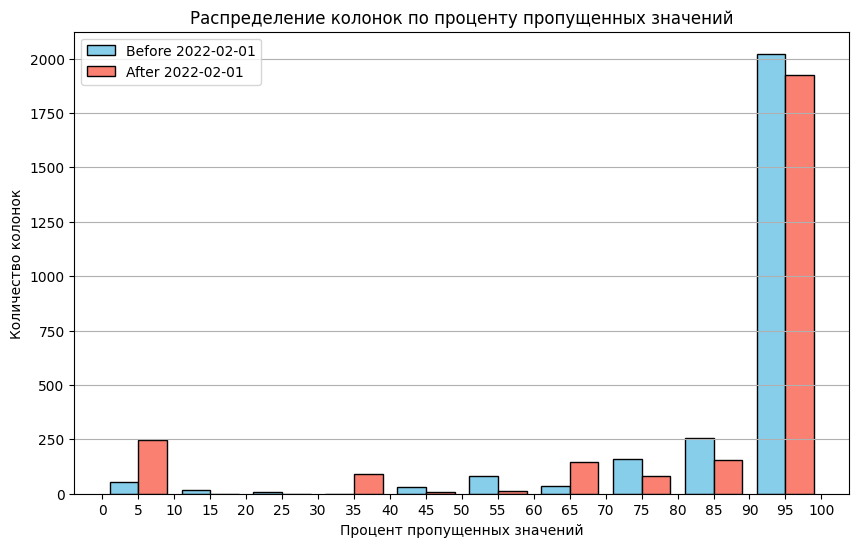

In [13]:
#4. Подсчет пропущенных значений До и После 2022-02-01
df_before = df[df['report_date'] <= '2022-02-01']
df_after = df[df['report_date'] > '2022-02-01']

def plot_missing_values_histogram(df1, df2, bins=10, labels=['df1', 'df2']):
    """
    Построение гистограммы распределения колонок по проценту пропущенных значений для двух датафреймов.

    Parameters:
    - df1, df2: DataFrames, в которых необходимо анализировать пропущенные значения.
    - bins: количество корзин для гистограммы.
    - labels: список из двух элементов с названиями для легенды.
    """
    # Вычисление процента пропущенных значений для каждой колонки
    missing_percentage_df1 = (df1.isnull().sum() / len(df1)) * 100
    missing_percentage_df2 = (df2.isnull().sum() / len(df2)) * 100

    # Построение гистограммы
    plt.figure(figsize=(10, 6))
    plt.hist([missing_percentage_df1, missing_percentage_df2], bins=bins, color=['skyblue', 'salmon'], edgecolor='black', label=labels)
    plt.title('Распределение колонок по проценту пропущенных значений')
    plt.xlabel('Процент пропущенных значений')
    plt.ylabel('Количество колонок')
    plt.grid(axis='y')
    plt.xticks(list(range(0, 105, 5)))  # Значения по оси X с шагом в 5 процентов
    plt.legend()
    plt.show()

plot_missing_values_histogram(df_before, df_after, labels=['Before 2022-02-01', 'After 2022-02-01'])

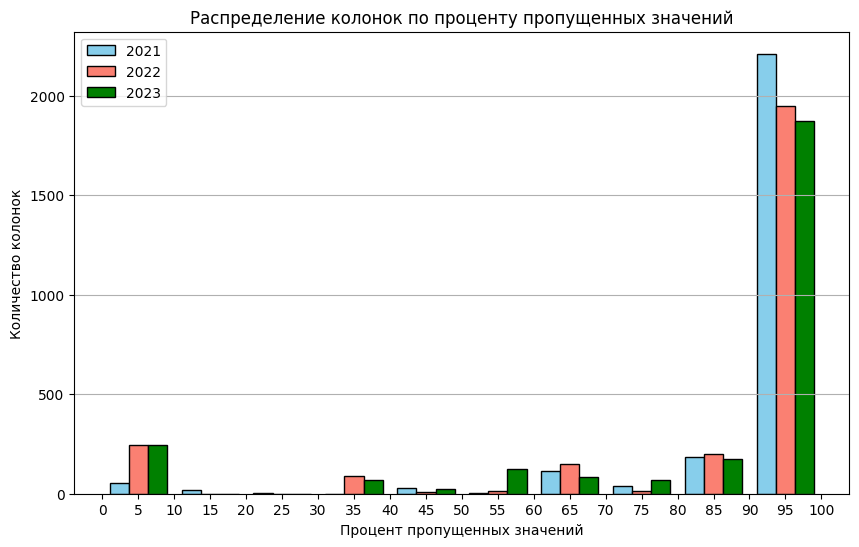

In [14]:
#5. Подсчет пропущенных значений по годам
df_2021 = df[df['report_date'] <= '2021-12-01']
df_2022 = df[(df['report_date'] > '2021-12-01') & (df['report_date'] <= '2022-12-01')]
df_2023 = df[df['report_date'] >= '2022-12-01']

def plot_missing_values_histogram(df1, df2, df3, bins=10, labels=['df1', 'df2', 'df3']):
    """
    Построение гистограммы распределения колонок по проценту пропущенных значений для двух датафреймов.

    Parameters:
    - df1, df2: DataFrames, в которых необходимо анализировать пропущенные значения.
    - bins: количество корзин для гистограммы.
    - labels: список из двух элементов с названиями для легенды.
    """
    # Вычисление процента пропущенных значений для каждой колонки
    missing_percentage_df1 = (df1.isnull().sum() / len(df1)) * 100
    missing_percentage_df2 = (df2.isnull().sum() / len(df2)) * 100
    missing_percentage_df3 = (df3.isnull().sum() / len(df3)) * 100

    plt.figure(figsize=(10, 6))
    plt.hist([missing_percentage_df1, missing_percentage_df2, missing_percentage_df3], bins=bins, color=['skyblue', 'salmon', 'green'], edgecolor='black', label=labels)
    plt.title('Распределение колонок по проценту пропущенных значений')
    plt.xlabel('Процент пропущенных значений')
    plt.ylabel('Количество колонок')
    plt.grid(axis='y')
    plt.xticks(list(range(0, 105, 5))) 
    plt.legend()
    plt.show()

plot_missing_values_histogram(df_2021, df_2022, df_2023, labels=['2021', '2022', '2023'])


# В связи с уходом некоторых компаний, число пропусков увеличилось

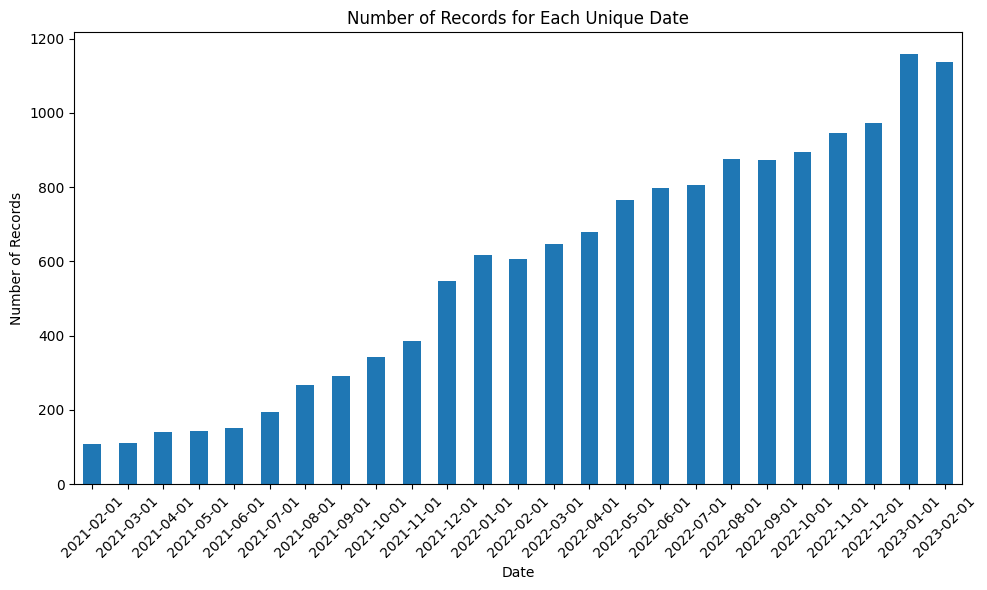

In [177]:
#6. Количество записей по каждой дате
date_counts = df['report_date'].value_counts().sort_index()
plt.figure(figsize=(10,6))
date_counts.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Number of Records for Each Unique Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()